# Task 2
**What We will learn**
- Understand experimentation and uplift testing, comparing trial and control stores.
- Learn control store selection based on defined metrics.
- Gain experience in data visualization.
- Perform statistical analysis to assess sales differences and formulate recommendations.

**What We will do**
- Define metrics to select control stores.
- Analyze trial stores against controls.
- Use Python for data analysis and visualization and summarise findings and provide recommendations.

In [ ]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the Data as DataFrame
# Load the data
data = pd.read_csv(r"/content/QVI_data.csv")

In [ ]:
# Checking the first 5th rows in our data
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
# Informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [ ]:
# Missing Values
data.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- Zero null values, good beginning

## Select control stores
- The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire observation period.
- We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :


```
# • Monthly overall sales revenue
#• Monthly number of customers
#• Monthly number of transactions per customer
```



- Let’s first create the metrics of interest and filter to stores that are present throughout the pre-trial period

In [ ]:
# Extracting by month, and year/month
data["DATE"] = pd.to_datetime(data["DATE"]) # DATE column to datetime
data["MONTH"] = data["DATE"].dt.month # Create month column for each month
data["YEAR_MONTH"] = data["DATE"].dt.to_period("M") # Create YEAR/MONTH column

In [ ]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,3,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,3,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11,2018-11


- In this next step, let's make a visualization the TOT_SALES in each month and see which month we has the high sales

In [ ]:
high_sale = data.groupby(["MONTH"])["TOT_SALES"].sum().sort_values(ascending=False)
high_sale

MONTH
12    167913.40
3     166265.20
7     165275.30
10    164415.70
1     162642.30
6     160538.60
9     160522.00
11    160233.70
4     159845.10
8     158081.05
5     156717.65
2     150665.00
Name: TOT_SALES, dtype: float64

- Depening on the results above we can say that December comes first followed by March and July

- What About the monthly Total sale in each store

In [ ]:
month_sale_store = data.groupby(["STORE_NBR", "MONTH"])["TOT_SALES"].sum().sort_values(ascending=False)
month_sale_store  = pd.DataFrame(month_sale_store)
month_sale_store.head()

TOT_SALES
STORE_NBR MONTH           
226       12        1659.6
58        7         1627.2
226       11        1602.6
          3         1561.6
          5         1530.9

In [ ]:
month_customers  =data.groupby(["MONTH"])["LYLTY_CARD_NBR"].count().sort_values(ascending=False)
month_customers

MONTH
12    22835
3     22592
7     22562
8     22410
5     22391
10    22288
1     22161
11    21852
6     21829
4     21766
9     21743
2     20405
Name: LYLTY_CARD_NBR, dtype: int64

- December is always the first with 22835 followed by March about 22592 transaction

### Let's check How many unique customer we have every month

In [ ]:
unique_month_customers  =data.groupby(["MONTH"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
unique_month_customers

MONTH
12    19076
3     18897
7     18780
8     18718
5     18608
10    18570
1     18463
11    18299
6     18264
9     18191
4     18164
2     17249
Name: LYLTY_CARD_NBR, dtype: int64

- As the same as we got first, by checking unique card transactions seemed like Decembre and March still being the best  months.
- Back to the main steps by selecting control stores where stores 77, 86 and 88 are selected as trial stores, and client want control stores to be established stores that are operational for the entire observation period

In [ ]:
# let's get some details about trial stores using Query method and select them as separate dataframes

In [ ]:
trial_stores = data.query("STORE_NBR == 77 or STORE_NBR == 86 or STORE_NBR == 88")
store_77 = data.query("STORE_NBR == 77")
store_86 = data.query("STORE_NBR == 86")
store_88 = data.query("STORE_NBR == 88")

# Other stores
other_stores = data.query("STORE_NBR != 77 & STORE_NBR != 86 & STORE_NBR != 88")

In [ ]:
## Checking the data to make sure that the query is correct and selected the right stores as trial and other
""""for i in other_stores["STORE_NBR"]:
  if other_stores["STORE_NBR"][i]== 77 & i == 88 & i == 86:
    print(i)
  else:
    print("Store not trial"  )"""

'"for i in other_stores["STORE_NBR"]:\n  if other_stores["STORE_NBR"][i]== 77 & i == 88 & i == 86:\n    print(i)\n  else: \n    print("Store not trial"  )'

In [ ]:
# let's visualize the total sales for each store during the period before 03-2019
# First We want just illustrate the period before 03_2019
store_77_before = store_77[store_77.YEAR_MONTH < '2019-03']
store_86_before = store_86[store_86.YEAR_MONTH < '2019-03']
store_88_before = store_88[store_88.YEAR_MONTH < '2019-03']

### Trial store before 03-2019
trial_stores_before = trial_stores[trial_stores.YEAR_MONTH < '2019-03']
## Other stores before
other_stores_before = other_stores[other_stores.YEAR_MONTH < '2019-03']

In [ ]:
trial_stores_before

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR_MONTH
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,9,2018-09
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2,2019-02
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,1,2019-01
73373,77004,2018-07-18,77,74918,30,Doritos Corn Chips Cheese Supreme 170g,1,4.4,170,DORITOS,RETIREES,Budget,7,2018-07
73374,77004,2018-07-26,77,74919,46,Kettle Original 175g,2,10.8,175,KETTLE,RETIREES,Budget,7,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,12,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,10,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,10,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,10,2018-10


In [ ]:
other_stores_before

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9,2018-09
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11,2018-11
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,12,2018-12
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,12,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264797,880551,2018-09-11,237,86491,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,300,OLD,OLDER SINGLES/COUPLES,Premium,9,2018-09
264798,880711,2018-09-04,237,86566,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,OLDER FAMILIES,Budget,9,2018-09
264799,880711,2018-09-15,237,86567,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,OLDER FAMILIES,Budget,9,2018-09
264800,883791,2018-09-12,237,88099,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,110,INFUZIONS,OLDER SINGLES/COUPLES,Mainstream,9,2018-09


<Axes: xlabel='YEAR_MONTH'>

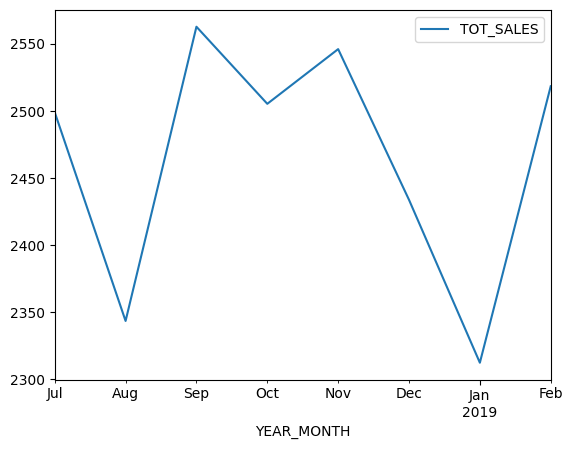

In [ ]:
# grouping data in both trial and other stores by stores numbers for number of product quantity and total sales per nonth
# trial stores
trial = pd.DataFrame(trial_stores_before.groupby(["YEAR_MONTH"])["TOT_SALES"].sum()).plot()

trial

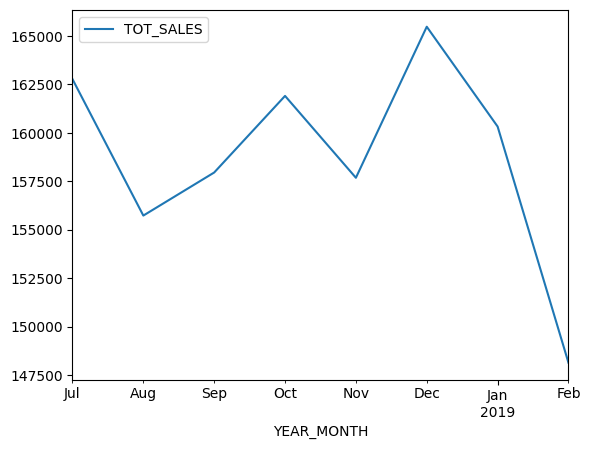

In [ ]:
other = pd.DataFrame(other_stores_before.groupby(["YEAR_MONTH"])["TOT_SALES"].sum()).plot()


In [ ]:
other = other_stores_before.groupby(["STORE_NBR", "MONTH"])["TOT_SALES"].sum()


In [ ]:
# Checking null values again
#print(store_77_before.isnull().sum(),"\n-------------\n", store_86_before.isnull().sum(),"\n-------------\n",store_88_before.isnull().sum())

# To be continued ....